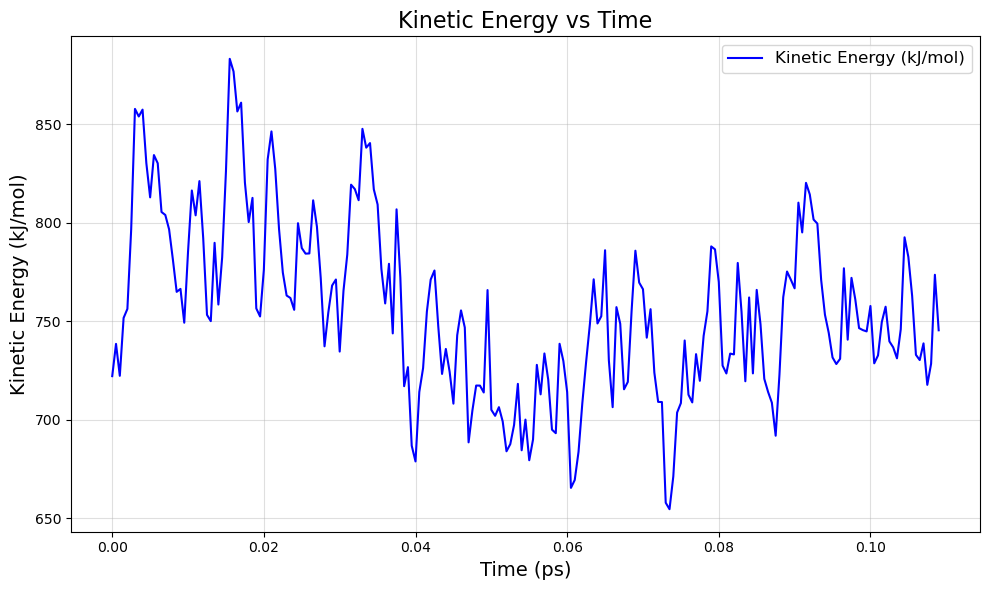

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read the energy file
def read_energy_file(file_path):
    time = []
    kinetic_energy = []
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith("#") and line.strip():  # Skip header/comments and empty lines
                columns = line.split()
                time.append(float(columns[1]) * 1e-3)  # Convert fs to ps
                kinetic_energy.append(float(columns[2]) * 2625.5)  # Convert a.u. to kJ/mol
    return np.array(time), np.array(kinetic_energy)

# File path
file_path = "proton_aimd_1ps-1.ener"

# Read and clean the data
time, kinetic_energy = read_energy_file(file_path)

# Sort by time to handle irregular time step order
sorted_indices = np.argsort(time)
time = time[sorted_indices]
kinetic_energy = kinetic_energy[sorted_indices]

# Plot kinetic energy vs. time
plt.figure(figsize=(10, 6))
plt.plot(time, kinetic_energy, label="Kinetic Energy (kJ/mol)", color="blue", linewidth=1.5)
plt.xlabel("Time (ps)", fontsize=14)
plt.ylabel("Kinetic Energy (kJ/mol)", fontsize=14)
plt.title("Kinetic Energy vs Time", fontsize=16)
plt.grid(alpha=0.4)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
